<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/car_crashes/crashes_temporalseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
acidentes = pd.read_excel('Acidentes_de_Trânsito_Ex2.xlsx')
acidentes = acidentes.dropna()
acidentes.columns = ['Serie 1980-90','Meses','Obitos']

acidentes.drop(acidentes.index[:1], inplace=True)
acidentes.head()


,Serie 1980-90,Meses,Obitos
2,1,1980-01-01 00:00:00,206
3,2,1980-02-01 00:00:00,201
4,3,1980-03-01 00:00:00,230
5,4,1980-04-01 00:00:00,201
6,5,1980-05-01 00:00:00,241


In [11]:
acidentes['Obitos'] = pd.to_numeric(acidentes['Obitos'])
acidentes['Serie 1980-90'] = pd.to_numeric(acidentes['Serie 1980-90']) 

acidentes.tail()

,Serie 1980-90,Meses,Obitos
117,116,1989-08-01 00:00:00,269
118,117,1989-09-01 00:00:00,245
119,118,1989-10-01 00:00:00,269
120,119,1989-11-01 00:00:00,245
121,120,1989-12-01 00:00:00,302


In [7]:
acidentes.describe()

,Serie 1980-90,Obitos
count,120.000000,120.000000
mean,60.500000,213.191667
std,34.785054,50.470109
min,1.000000,88.000000
25%,30.750000,178.750000
50%,60.500000,211.500000
75%,90.250000,251.000000
max,120.000000,333.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


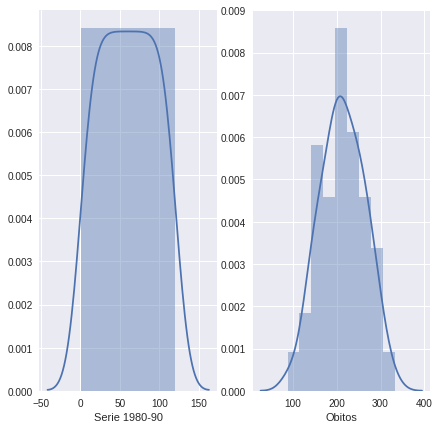

In [12]:
fig, ax = plt.subplots(1,2,figsize=(7,7))

ax_meses = sns.distplot(acidentes['Serie 1980-90'], ax=ax[0])

ax_obitos = sns.distplot(acidentes['Obitos'], ax=ax[1])

In [27]:
X_values = acidentes['Obitos'].values

transformer = StandardScaler()
X_transformed = transformer.fit_transform(X_values.reshape(-1,1))

pd.DataFrame(X_transformed).head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0
0,-0.143091
1,-0.242575
2,0.334432
3,-0.242575
4,0.553296
